# Introduction

In this statistical analysis project, we will work on a diamond dataset that contains diamond price, table, depth, x-y-z dimensions, color, clarity, cut quality, and carat. 

We will first perform descriptive analysis on some of the features by calculating its central tendency and dispersion. Then we will perform regression on diamond price using multiple techniques and approaches and compare their performance. And Finally, we will attempt to classify the clarity of the diamond based on its other features.

the dataset used can be found here:
https://www.kaggle.com/shivam2503/diamonds

# Importing Libraries


In [1]:
import numpy as np #for array manipulation
import pandas as pd #for data manipulation
import matplotlib.pyplot as plt #for plotting
import seaborn as sns  #for plotting
import math #for mathematical calculations

# Reading Dataset
Reading the dataset into a Pandas Dataframe Object


In [3]:
data = pd.read_csv("diamonds.csv")

Taking a quick look at what the data looks like:

In [4]:
data.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


# Data cleaning

## Handling Categorical values 

The diamonds' cut range from fair(worst) to ideal(best). Because these values are ordinal, we can replace them with numerical values starting from 0 to 4.

In [5]:
data['cut'].replace(['Fair', 'Very Good', 'Good', 'Premium', 'Ideal'],
             [0, 1, 2, 3, 4], inplace=True)

The diamonds' color range from J(worst) to D(best), also ordinal. We will replace them with numerical values starting from 0 to 6.

In [6]:
data['color'].replace(['J', 'I', 'H', 'G', 'F', 'E', 'D'],
             [0, 1, 2, 3, 4, 5, 6], inplace=True)

The diamonds' clarity's range (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best)), also ordinal. We will replace them with numerical value starting from 0 to 7.

In [7]:
data['clarity'].replace(['IF', 'VVS1', 'VVS2', 'VS1', 'VS2', 'SI1', 'SI2', 'I1'],
             [7, 6, 5, 4, 3, 2, 1, 0], inplace=True)
             

## Handling null values

counting the null values in our data:

In [8]:
data.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

This shows us that our data does not have any null values.

## Handling Outliers

Counting the number of rows in our data before removing the outliers:


In [9]:
data.count()

carat      53940
cut        53940
color      53940
clarity    53940
depth      53940
table      53940
price      53940
x          53940
y          53940
z          53940
dtype: int64

Removing outliers:

In [10]:
from scipy import stats

data = data[(np.abs(stats.zscore(data)) < 3).all(axis=1)]


Counting the number of rows after removing the outliers:

In [11]:
data.count()

carat      51590
cut        51590
color      51590
clarity    51590
depth      51590
table      51590
price      51590
x          51590
y          51590
z          51590
dtype: int64

This shows us that now we have a dataset with 51590 rows. We only lost 2350 rows due to outliers removal.

# Data description

The diamond dataset contains the prices, clarity, dimensions, and other features of 51,590 diamonds.

The code below calculates the needed number of classes in our future histograms and stores in in a variable called bin_cnt.

In [12]:
bin_cnt = 1 + (10/3) * math.log10(data.carat.count())
math.ceil(bin_cnt)
bin_cnt = int(bin_cnt)
bin_cnt

16

## Carat
As we see the first feature of the data is the diamonds' **carat**. Carat is the weight of the diamond.

Since carat is Quantatative continous data we we will use a histogram to visualize it.

<AxesSubplot:xlabel='carat', ylabel='Count'>

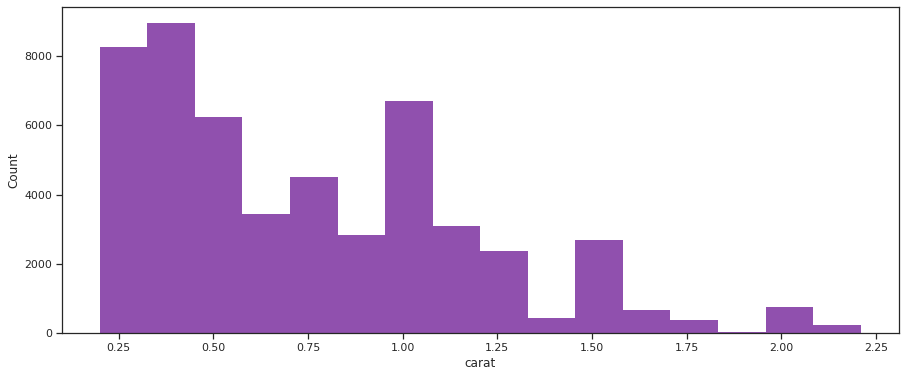

In [113]:
fig = plt.figure(figsize=(15, 6))
sns.histplot(data=data, x="carat", bins=bin_cnt, linewidth=0, color='#6b1693')


<AxesSubplot:xlabel='carat'>

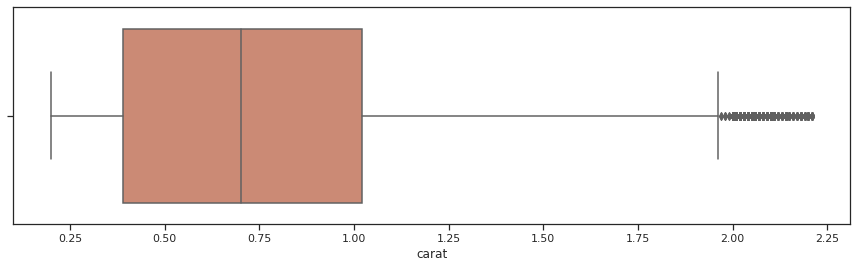

In [114]:
fig = plt.figure(figsize=(15, 4))
sns.boxplot(x=data['carat'], color='#da8266')


This shows that the diamonds' carat is a positively skewed distribution. That means that most of the diamonds are light in weight.

In [15]:
data['carat'].mean()

0.7599325450668736

In [16]:
data['carat'].median()

0.7

In [17]:
data['carat'].mode()

0    0.3
dtype: float64

In [18]:
data['carat'].std()

0.4249831844150389

In [19]:
data['carat'].std() / data['carat'].mean()

0.5592380365518372

This shows us that the average weight of diamonds is 0.7599 carats, while the median is 0.7 carats. which confirms that the diamonds are positively skewed ( mean > median > mode). The standard deviation is 0.425 carats.

## Cut
The second feature in our data is the diamonds' **cut**. it describes quality of the cut of the diamond. it varies from fair to ideal which we replaced with values from 0 to 4.

Since the cut is Categorical ordinal data we we will use a bar chart to visualize it.

/home/omar/ml/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


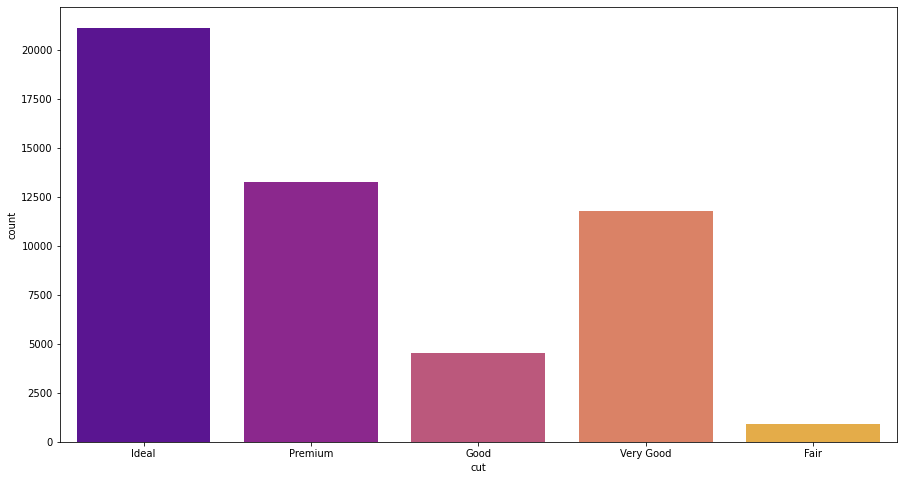

In [20]:
#temporarily replacing the numerical values of the cut with it's original categorical values for better visualization
tmp = data.copy(deep = True)
tmp['cut'].replace([0, 1, 2, 3, 4],['Fair', 'Very Good', 'Good', 'Premium', 'Ideal'], inplace=True)

#plotting the data using the seaborn library
plt.figure(figsize=(15, 8))
sns.countplot(tmp['cut'], palette="plasma")
plt.show()


<AxesSubplot:ylabel='Diamonds Cut'>

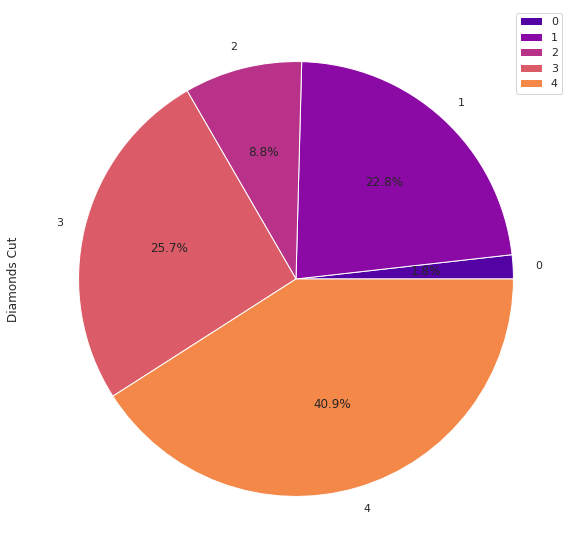

In [115]:
plt.figure(figsize=(15, 10))
colors = sns.color_palette('plasma')
tmp.groupby('cut').size().plot(kind='pie',label='Diamonds Cut', 
                               autopct='%.1f%%', legend=True,colors=colors)
                               

In [22]:
tmp['cut'].mode()

0    Ideal
dtype: object

This shows that the diamonds are mostly cut of good quality. and that the cut that is done most frequently is an ideal cut.

## Color
The third feature in our data is the diamonds' **color**. it describes the color of the diamond. it varies from J(worst) to D(best) which we replaced with values from 0 to 6.

Since the color is Categorical ordinal data we we will use a bar chart to visualize it.

/home/omar/ml/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


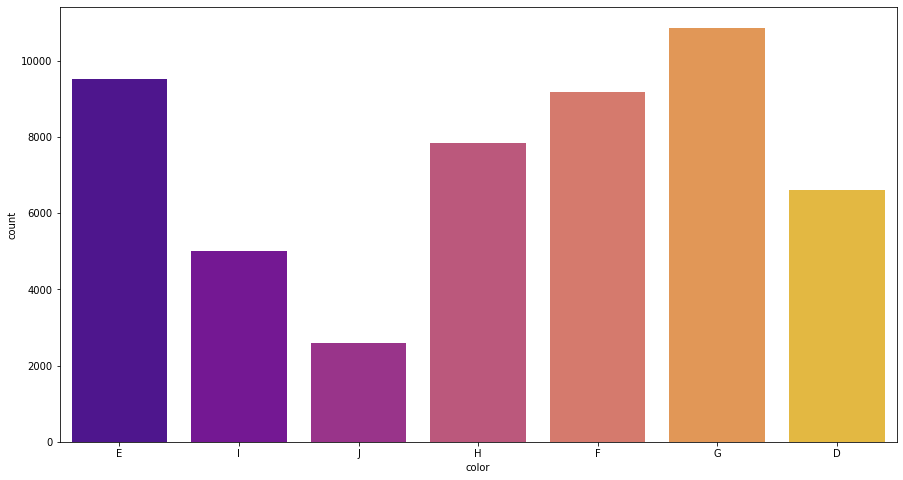

In [23]:
#temporarily replacing the numerical values of the cut with it's original categorical values for better visualization
tmp = data.copy(deep = True)
tmp['color'].replace([0, 1, 2, 3, 4, 5, 6],['J', 'I', 'H', 'G', 'F', 'E', 'D'], inplace=True)

#plotting the data using the seaborn library
plt.figure(figsize=(15, 8))
sns.countplot(tmp['color'], palette="plasma")
plt.show()


In [24]:
tmp['color'].mode()

0    G
dtype: object

This shows that the the color that appears most frequently in diamonds is G

## Clarity

The fourth feature in our data is the diamonds' **clarity** - how obvious inclusions are within the diamond. A measurement of how clear the diamond is (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best))  which we replaced with values from 0 to 7.

Since the clarity is categorical ordinal data we we will use a bar chart to visualize it.

/home/omar/ml/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


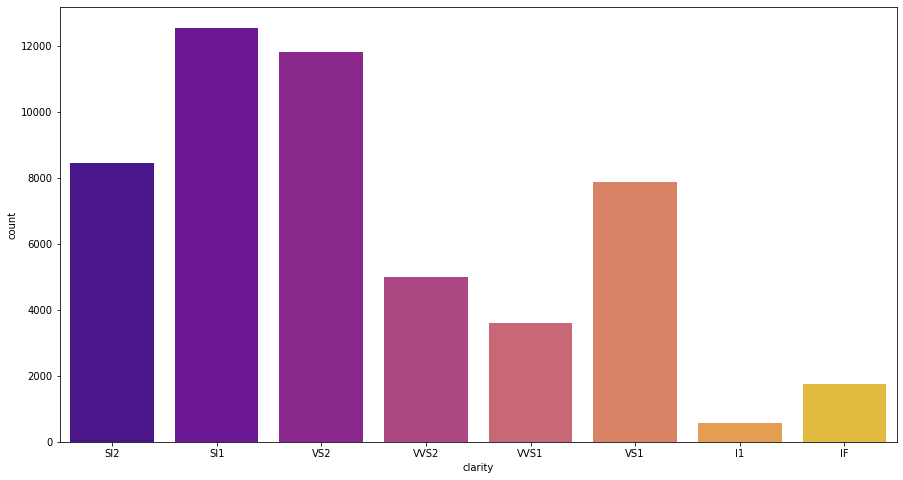

In [25]:
#temporarily replacing the numerical values of the cut with it's original categorical values for better visualization
tmp = data.copy(deep = True)
tmp['clarity'].replace([7, 6, 5, 4, 3, 2, 1, 0], ['IF', 'VVS1', 'VVS2', 'VS1', 'VS2', 'SI1', 'SI2', 'I1'], inplace=True)

#plotting the data using the seaborn library
plt.figure(figsize=(15, 8))
sns.countplot(tmp['clarity'], palette="plasma")
plt.show()


In [26]:
tmp['clarity'].mode()

0    SI1
dtype: object

This shows that the most common clarity is SI1 which is the second worst clarity.
The plot shows that most of the diamonds are of bad clarity.

## Depth

The fifth feature of the data is the diamonds' **depth%**. Depth percentage is the height of a diamond, measured from the culet to the table, divided by its average girdle diameter.

Since depth percentage is quantatative continous data we we will use a histogram to visualize it.

<AxesSubplot:xlabel='depth', ylabel='Count'>

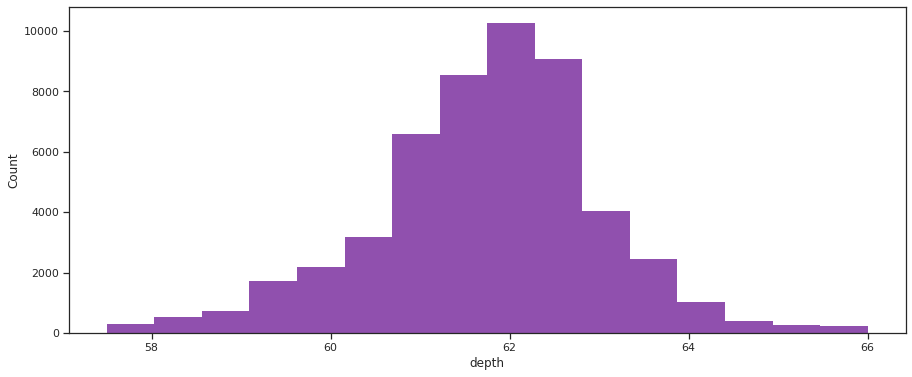

In [116]:
fig = plt.figure(figsize = (15,6))
sns.histplot(data= data,x="depth",bins=bin_cnt, 
             linewidth=0 , color='#6b1693')
             

<AxesSubplot:xlabel='depth'>

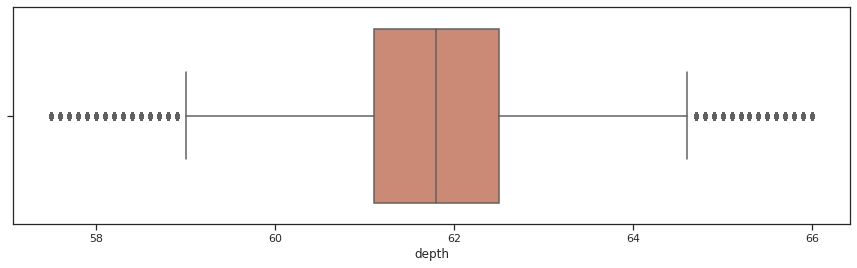

In [117]:
fig = plt.figure(figsize=(15, 4))
sns.boxplot(x=data['depth'], color='#da8266')


This shows that the diamonds' depth percentage is almost normal distribution. That means that most of the diamonds' depth percentage is approaching the mean.

In [29]:
data['depth'].mean()

61.75283775925566

In [30]:
data['depth'].median()

61.8

In [31]:
data['depth'].mode()

0    62.0
dtype: float64

In [32]:
data['depth'].std()

1.2692551121231683

In [33]:
data['depth'].std()/data['depth'].mean()

0.020553794095607036

This shows us that the average depth percentage of diamonds is 61.7528%, while the median is 61.8%. Which means that mean and median are approximately equal which confirms the diamond's depth percentage is distributed normally as stated before ( mean = median = mode). 
The standard deviation is 1.2693%.

## Table

The sixth feature of the data is the diamonds' **table%**. Table percentage is the width of the diamond's table expressed as a percentage of its average diameter.

Since table percentage is quantatative continous data we we will use a histogram to visualize it.

<AxesSubplot:xlabel='table', ylabel='Count'>

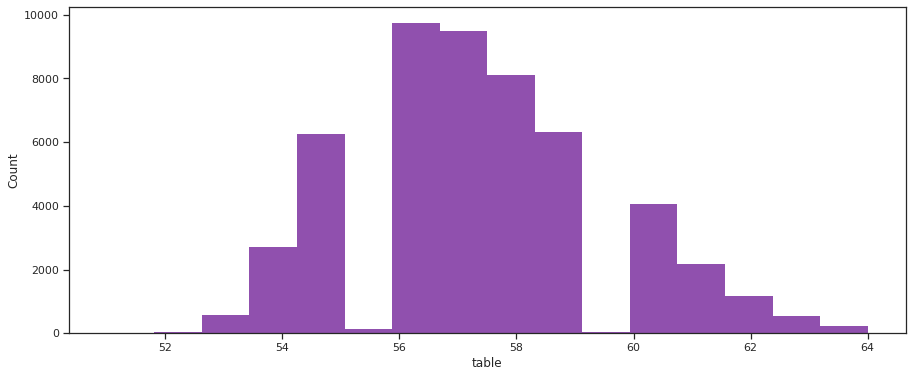

In [118]:
fig = plt.figure(figsize = (15,6))
sns.histplot(data= data,x="table",bins=bin_cnt, 
             linewidth=0 , color='#6b1693')
             

<AxesSubplot:xlabel='table'>

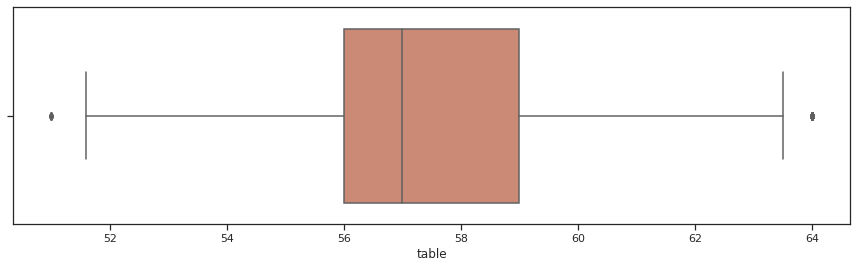

In [119]:
fig = plt.figure(figsize=(15, 4))
sns.boxplot(x=data['table'], color='#da8266')


This shows that the diamonds' table percentage looks as if it is almost normal distribution, however, it is positively skewed. This means that most of the diamonds' table percentages are low.

In [36]:
data['table'].mean()

57.36913742973445

In [37]:
data['table'].median()

57.0

In [38]:
data['table'].mode()

0    56.0
dtype: float64

In [39]:
data['table'].std()

2.100017863715689

In [40]:
data['table'].std()/data['table'].mean()

0.03660535887066081

This shows us that the average table percentage of diamonds is 57.3691% which is greater that the median which is equal 57.0%, and both of them are greater than the mode which is equal to 56.0% . This confirms the diamond's table percentage distributionis positively skewed as stated above ( mean > median > mode ). 
The standard deviation is 2.10%.

## Price

The seventh feature of the data is the diamonds' **price**. Price is in US dollars.

Since the price is quantatative continous data we we will use a histogram to visualize it.

<AxesSubplot:xlabel='price', ylabel='Count'>

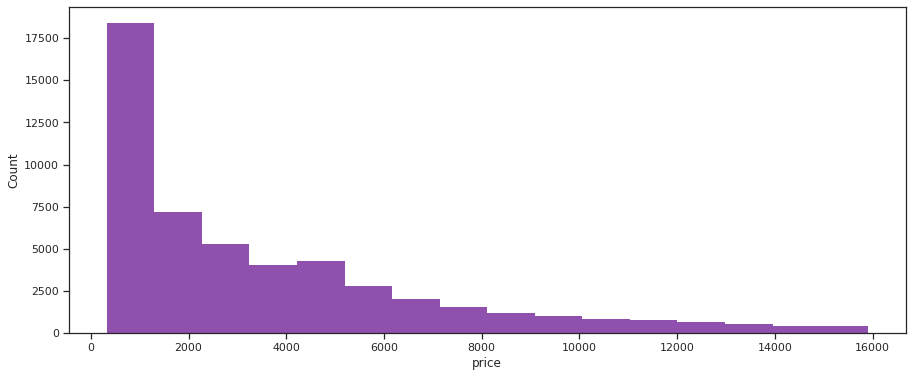

In [120]:
fig = plt.figure(figsize = (15,6))
sns.histplot(data= data,x="price",bins=bin_cnt, 
             linewidth=0 , color='#6b1693')


This is another histogram that uses logarithmic scale in the price and shows cut quality contribution in each price interval.

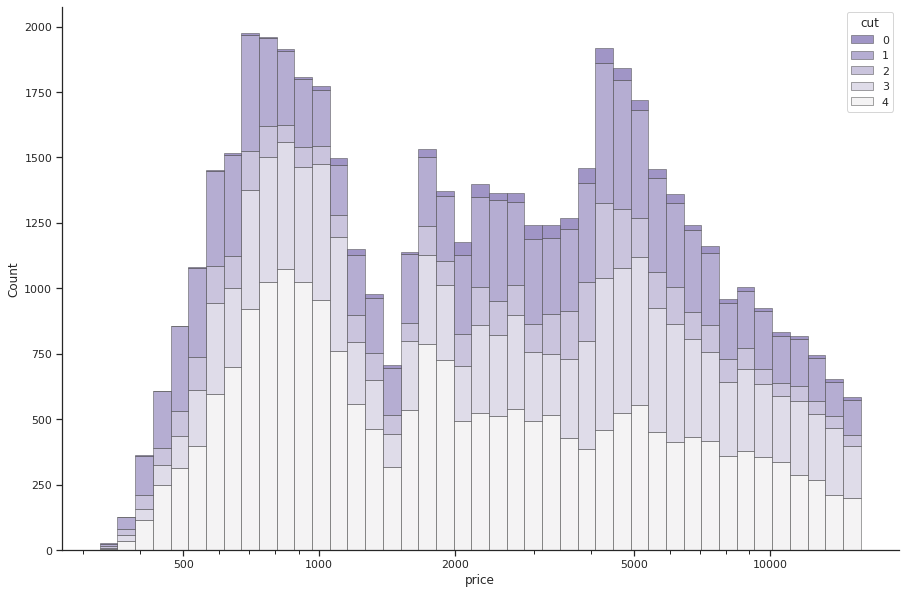

In [108]:
import matplotlib as mpl

sns.set_theme(style="ticks")

f, ax = plt.subplots(figsize=(15, 10))
sns.despine(f)

sns.histplot(
    data,
    x="price", hue="cut",
    multiple="stack",
    palette="light:m_r",
    edgecolor=".3",
    linewidth=.5,
    log_scale=True,
)
ax.xaxis.set_major_formatter(mpl.ticker.ScalarFormatter())
ax.set_xticks([500, 1000, 2000, 5000, 10000])


<AxesSubplot:xlabel='price'>

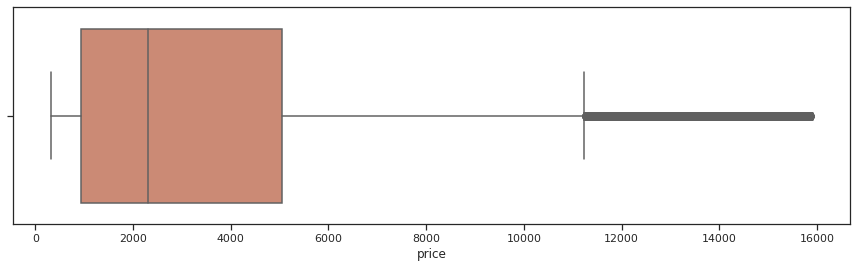

In [121]:
fig = plt.figure(figsize=(15, 4))
sns.boxplot(x=data['price'], color='#da8266')


This shows that the diamonds' price is a positively skewed distribution. That means that most of the diamonds are low priced.

In [43]:
data['price'].mean()

3586.0318472572203

In [44]:
data['price'].median()

2303.5

In [45]:
data['price'].mode()

0    605
dtype: int64

In [46]:
data['price'].std()

3436.87416064329

In [47]:
data['price'].std()/data['price'].mean()

0.9584059224883867

This shows that the average price of a diamond is 3586.0318 USD, while the median is 2303.5 USD. Which confirms that the diamonds' prices are positively skewed ( mean > median > mode).
The standard deviation is 3436.8742 USD.

## X

The eighth feature of the data is the diamonds' **x - length in mm**.

Since the length is quantatative continous data we we will use a histogram to visualize it.

<AxesSubplot:xlabel='x', ylabel='Count'>

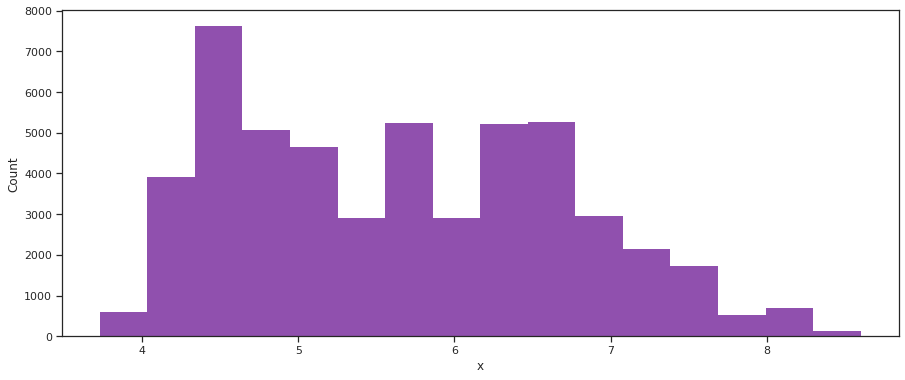

In [122]:
fig = plt.figure(figsize = (15,6))
sns.histplot(data= data,x="x",bins=bin_cnt, 
             linewidth=0 , color='#6b1693')

<AxesSubplot:xlabel='x'>

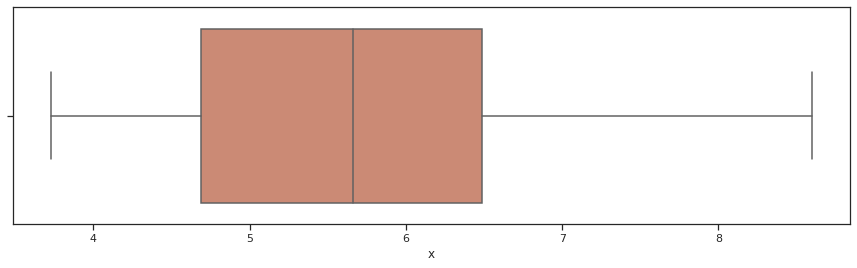

In [123]:
fig = plt.figure(figsize=(15, 4))
sns.boxplot(x=data['x'], color='#da8266')


This shows that the diamonds' length is a positively skewed distribution. That means that most of the diamonds' lengths are small.

In [50]:
data['x'].mean()

5.657855398333011

In [51]:
data['x'].median()

5.66

In [52]:
data['x'].mode()

0    4.37
dtype: float64

In [53]:
data['x'].std()

1.0574203108879536

In [54]:
data['x'].std()/data['x'].mean()

0.18689419160473847

This shows that the average length of a diamond in mm is 5.6579 mm which is approximately equal to the median which is 5.66 mm. However, the mode which is equal to 4.37 mm is smaller than both of the mean and the median. Thish confirms that the diamonds' lengths are positively skewed ( (mean = median) > mode ).
The standard deviation is 1.0574 mm.

## Y
The ninth feature of the data is the diamonds' **y - width in mm**.

Since the width is quantatative continous data we we will use a histogram to visualize it.

<AxesSubplot:xlabel='y', ylabel='Count'>

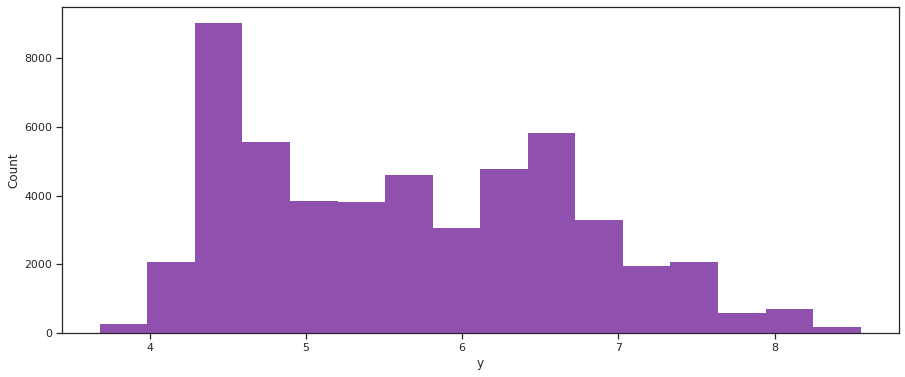

In [124]:
fig = plt.figure(figsize = (15,6))
sns.histplot(data= data,x="y",bins=bin_cnt, 
             linewidth=0 , color='#6b1693')


<AxesSubplot:xlabel='y'>

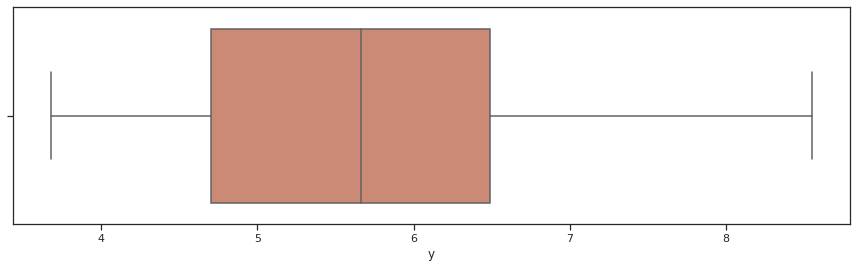

In [125]:
fig = plt.figure(figsize=(15, 4))
sns.boxplot(x=data['y'], color='#da8266')


This shows that the diamonds' width is a positively skewed distribution. That means that most of the diamonds' widths are small.

In [57]:
data['y'].mean()

5.661271758092654

In [58]:
data['y'].median()

5.66

In [59]:
data['y'].mode()

0    4.34
dtype: float64

In [60]:
data['y'].std()

1.0503827338877618

In [61]:
data['y'].std()/data['y'].mean()

0.18553829930284915

This shows that the average width of a diamond in mm is 5.6613 mm and the median is 5.66 mm and the mode is equal to 4.34 mm is smaller than both of the mean and the median. This confirms that the diamonds' width are positively skewed ( mean > median > mode ).
The standard deviation is 4.34 mm.

## Z
The tenth feature of the data is the diamonds' **z - depth in mm**.

Since the depth is quantatative continous data we we will use a histogram to visualize it.

<AxesSubplot:xlabel='z', ylabel='Count'>

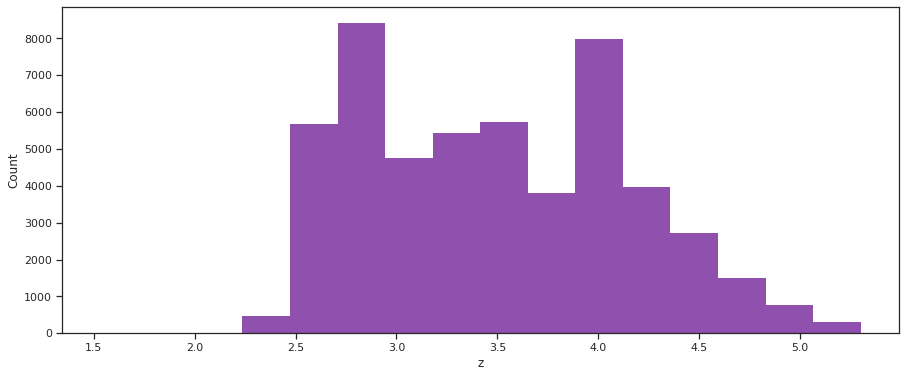

In [126]:
fig = plt.figure(figsize = (15,6))
sns.histplot(data= data,x="z",bins=bin_cnt, 
             linewidth=0 , color='#6b1693')

This shows that the diamonds' depth is a normal distribution. That means that most of the diamonds' depths are approaching the mean.

In [63]:
data['z'].mean()

3.494649156813336

In [64]:
data['z'].median()

3.49

In [65]:
data['z'].mode()

0    2.7
dtype: float64

In [66]:
data['z'].std()/data['z'].mean()

0.18687156700938728

This shows that the average depth of a diamond in mm is 3.4946 mm and the median is 3.49 mm and the mode is equal to 2.7 mm. This confirms that the diamonds' depths are positively skewed ( mean > median > mode ).
The standard deviation is 0.6531 mm.

## Summary of All Features' Characteristics

In [67]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
carat,51590.0,0.759933,0.424983,0.20,0.39,0.70,1.02,2.21
cut,51590.0,2.812231,1.238661,0.00,2.00,3.00,4.00,4.00
color,51590.0,3.433553,1.694698,0.00,2.00,3.00,5.00,6.00
clarity,51590.0,3.086994,1.642585,0.00,2.00,3.00,4.00,7.00
depth,51590.0,61.752838,1.269255,57.50,61.10,61.80,62.50,66.00
table,51590.0,57.369137,2.100018,51.00,56.00,57.00,59.00,64.00
price,51590.0,3586.031847,3436.874161,326.00,926.00,2303.50,5047.00,15898.00
x,51590.0,5.657855,1.057420,3.73,4.69,5.66,6.49,8.60
y,51590.0,5.661272,1.050383,3.68,4.70,5.66,6.49,8.55
z,51590.0,3.494649,0.653051,1.53,2.89,3.49,4.01,5.30


## Data Correlation

### Calculating Correlation Matrix

Calculating the correlation matrix of the dataset using `pandas.DataFrame.corr()` function

In [68]:
correlation_matrix = data.corr()
correlation_matrix

,carat,cut,color,clarity,depth,table,price,x,y,z
carat,1.000000,-0.111313,-0.276477,-0.346967,0.026977,0.187219,0.922409,0.982155,0.981280,0.981179
cut,-0.111313,1.000000,0.011467,0.142104,-0.178398,-0.368870,-0.053805,-0.099095,-0.104721,-0.122005
color,-0.276477,0.011467,1.000000,-0.038924,-0.045560,-0.023255,-0.155349,-0.254146,-0.254170,-0.258068
clarity,-0.346967,0.142104,-0.038924,1.000000,-0.057689,-0.161825,-0.133372,-0.365985,-0.360834,-0.368048
depth,0.026977,-0.178398,-0.045560,-0.057689,1.000000,-0.279868,-0.001898,-0.022916,-0.025336,0.090190
table,0.187219,-0.368870,-0.023255,-0.161825,-0.279868,1.000000,0.131684,0.194327,0.189223,0.160202
price,0.922409,-0.053805,-0.155349,-0.133372,-0.001898,0.131684,1.000000,0.890454,0.891719,0.887340
x,0.982155,-0.099095,-0.254146,-0.365985,-0.022916,0.194327,0.890454,1.000000,0.998634,0.992605
y,0.981280,-0.104721,-0.254170,-0.360834,-0.025336,0.189223,0.891719,0.998634,1.000000,0.992309
z,0.981179,-0.122005,-0.258068,-0.368048,0.090190,0.160202,0.887340,0.992605,0.992309,1.000000


Index(['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'price', 'x', 'y',
       'z'],
      dtype='object')

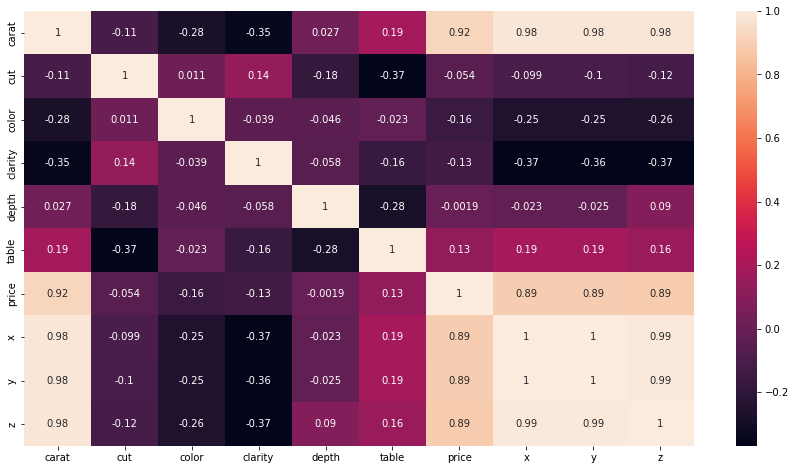

In [69]:
#Seaborn heatmap for the correlation between features
correlation_matrix = data.corr()
plt.figure(figsize=(15, 8))
sns.heatmap(correlation_matrix, annot=True)
data.columns

This matrix shows us the r's complement between all the variables.


### Calculating Price Correlation

Since our goal is to predict the price of the diamonds, we will use the price as our target variable and calculate all of the correlations related to it

In [70]:
#See the correlation between features and our target => Price
income_correlation = data.corr()['price']
income_correlation

carat      0.922409
cut       -0.053805
color     -0.155349
clarity   -0.133372
depth     -0.001898
table      0.131684
price      1.000000
x          0.890454
y          0.891719
z          0.887340
Name: price, dtype: float64

As we see the strongest relation is between the carat and the price. Right after it, comes the dimensions of the diamond (x,y,z) and the price.

In [71]:
#Use Groupby and Mean to understand the relation Between room_type and price
data[['cut','price']].groupby(['cut'],as_index=False).mean().sort_values(by='price',ascending=False)

,cut,price
0,0,4166.006522
3,3,4112.882473
1,1,3656.135521
2,2,3610.352642
4,4,3185.614583


In [73]:
data.corr()['price']


carat      0.922409
cut       -0.053805
color     -0.155349
clarity   -0.133372
depth     -0.001898
table      0.131684
price      1.000000
x          0.890454
y          0.891719
z          0.887340
Name: price, dtype: float64

# Data Visualisation

In order to get a strong understanding of how different features correlate to each other, we will use Seaborn library to create helpful plots and visualisations.

## Pair Plot

To help us decide on the type of regression and which data to correlate together more we will use a pair plot. This is a plot of pairwise relationships in the dataset. It creates a scatter plot between all the variables and colours them according to the diamond color.

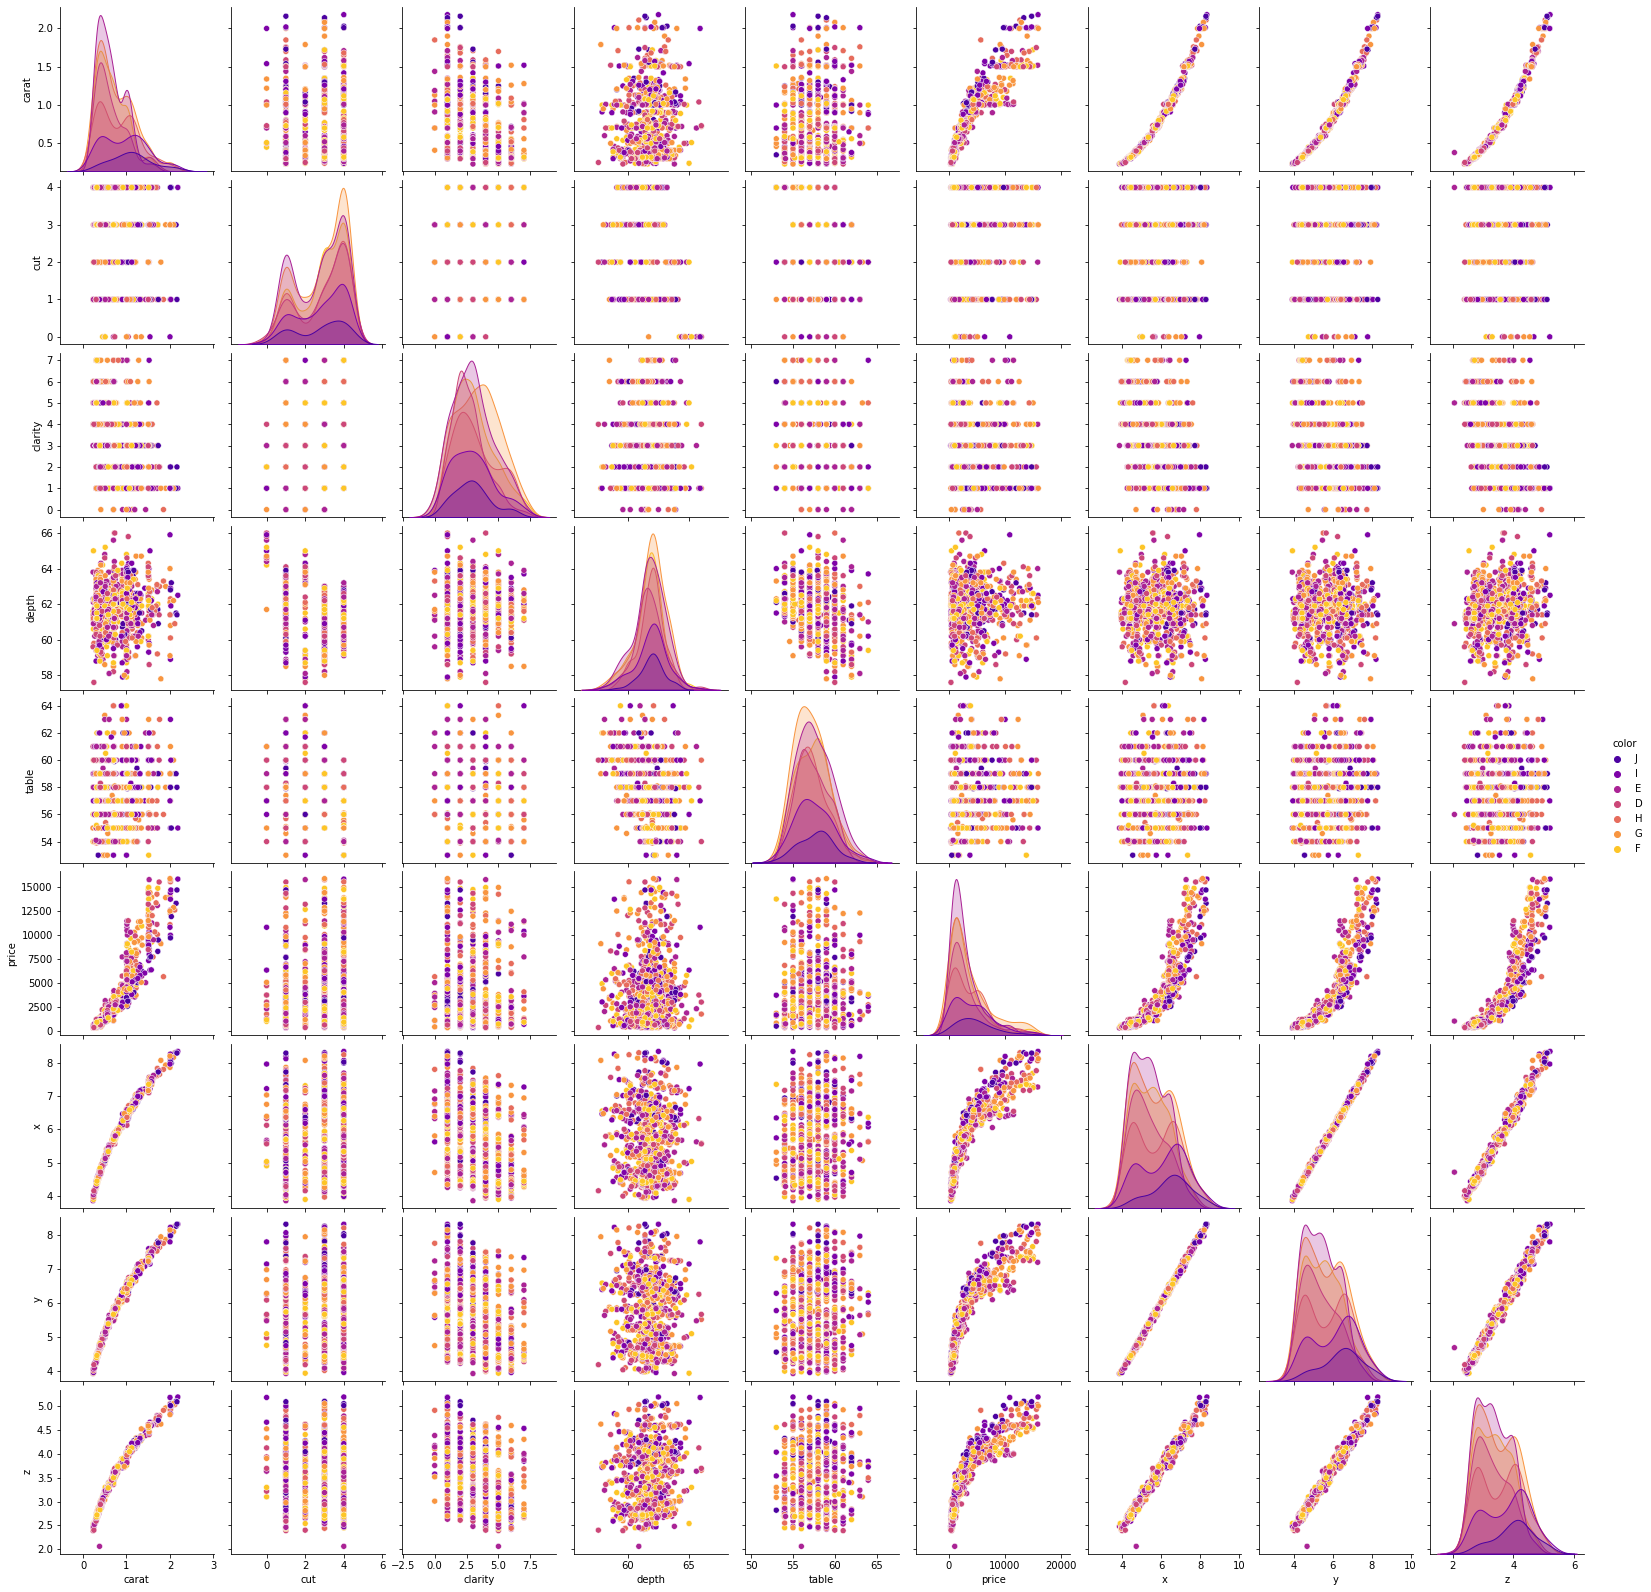

In [74]:
#Seaborn pairplot for correlation of features and Price
# sns.pairplot(data[100:1100].drop(['color'], axis=1),hue='price',palette='plasma')
tmp = data.copy(deep = True)
tmp['color'].replace([0, 1, 2, 3, 4, 5, 6],['J', 'I', 'H', 'G', 'F', 'E', 'D'], inplace=True)
sns.pairplot(tmp.sample(n=1000), hue= 'color',palette='plasma')

The pair plot shows us the following:

* The price linear regression can be done using the carat variable. 
* We might get better results using non linear regression since the data seems to form a curve. 

Since there is a strong correlation between the price and other variables. We will try using multi-variate linear and non linear regression

## Other plots

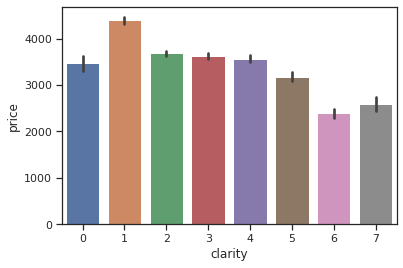

In [110]:
sns.barplot(x='clarity', y='price', data=data)
plt.show()


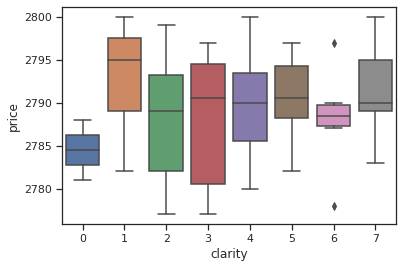

In [112]:
sns.boxplot(x='clarity', y='price', data=data[200:300])
plt.show()

/home/omar/ml/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='carat', ylabel='depth'>

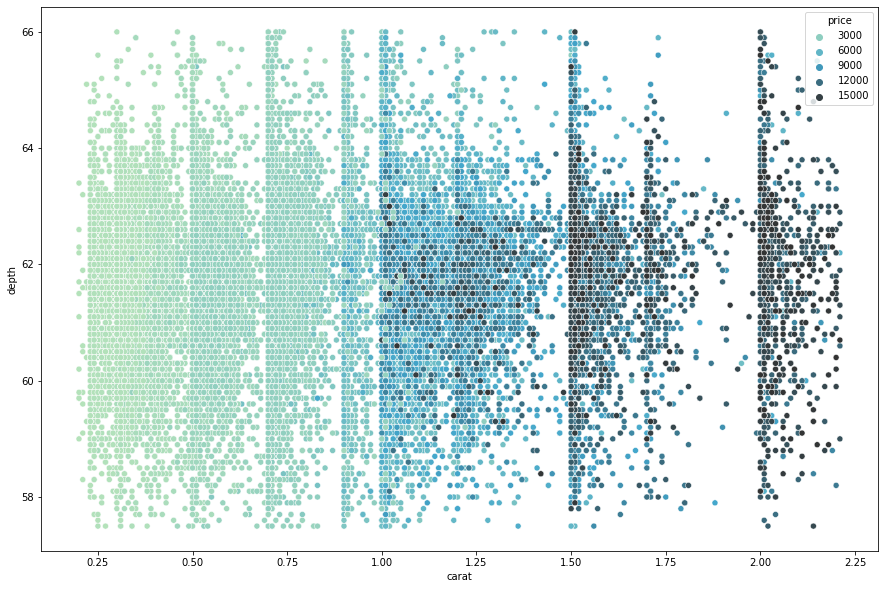

In [77]:
#Seaborn Scatter plot for Schooling and Income composition of resources with respect to Life expectancy
plt.figure(figsize=(15,10))
# plt.xlim([0, 3])
# plt.ylim([55, 70])
sns.scatterplot(data['carat'],data['depth'],hue=data['price'],palette='GnBu_d')

/home/omar/ml/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='x', ylabel='y'>

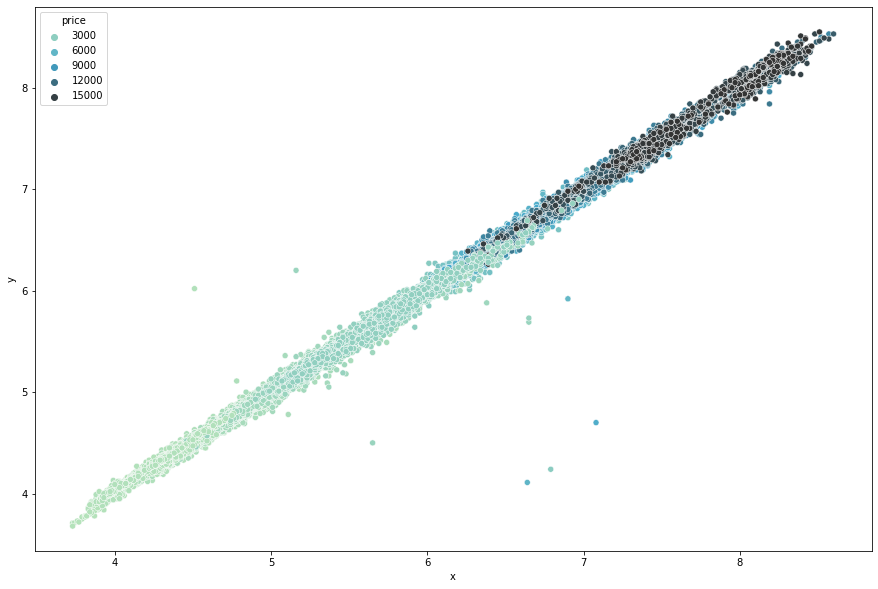

In [78]:
#Seaborn Scatter plot for Schooling and Income composition of resources with respect to Life expectancy
plt.figure(figsize=(15,10))
sns.scatterplot(data['x'],data['y'],hue=data['price'],palette='GnBu_d')

<AxesSubplot:xlabel='color', ylabel='Count'>

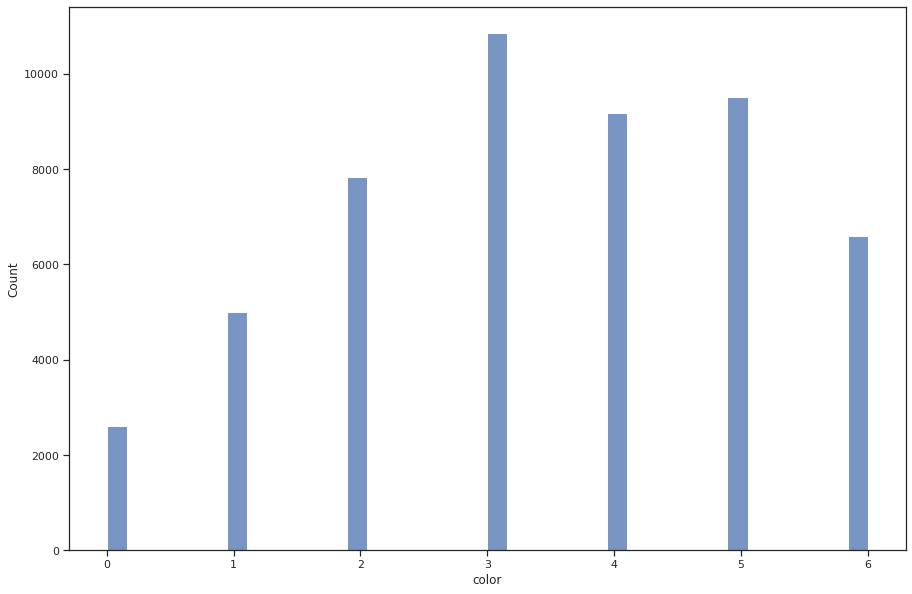

In [105]:
plt.figure(figsize=(15, 10))
sns.histplot(data['color'], color='b')

<AxesSubplot:xlabel='price', ylabel='Count'>

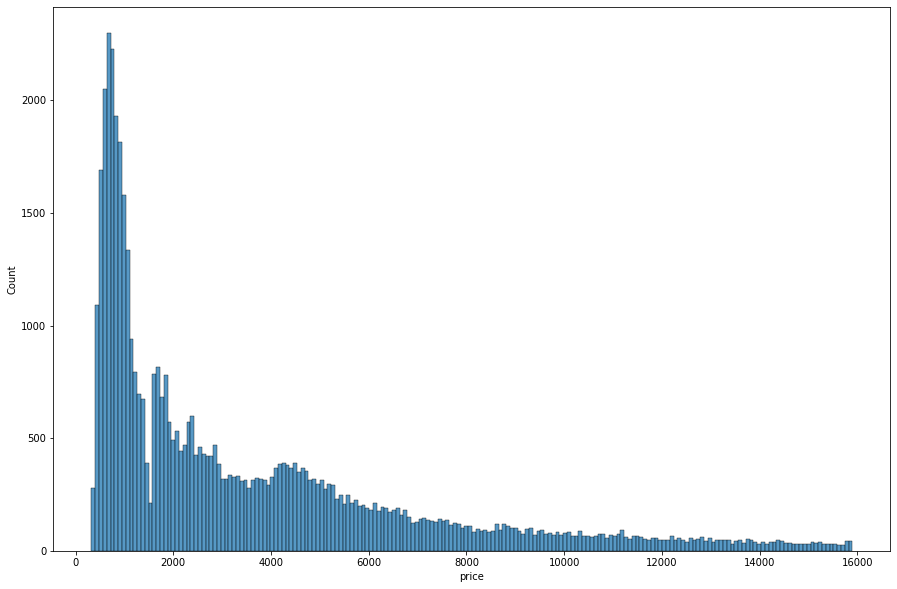

In [80]:
plt.figure(figsize=(15, 10))
sns.histplot(data['price'],palette='GnBu_d', bins=200)

<AxesSubplot:xlabel='color', ylabel='price'>

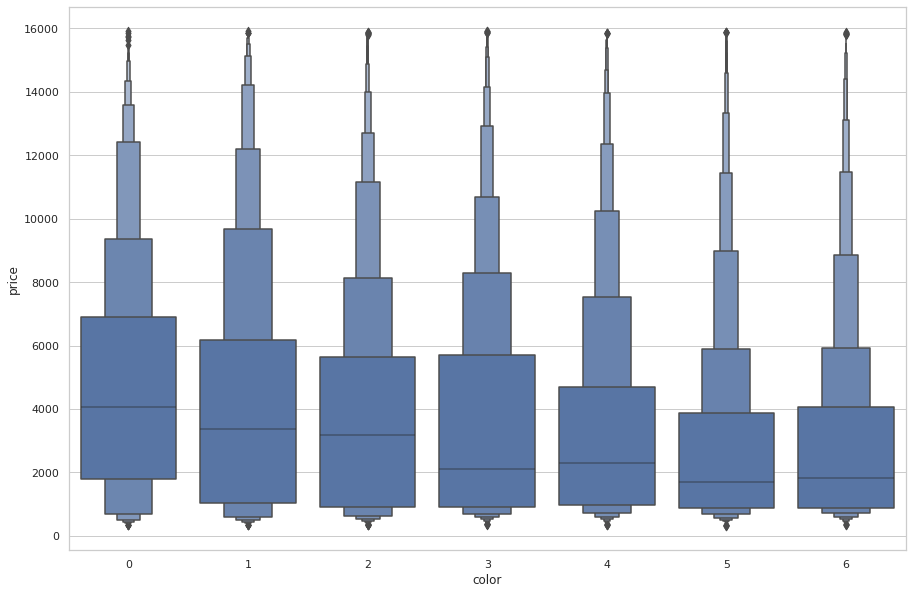

In [94]:
sns.set_theme(style="whitegrid")

plt.figure(figsize=(15, 10))
sns.boxenplot(x=data['color'], y=data['price'],
              color='b', data=data)


<AxesSubplot:xlabel='carat', ylabel='price'>

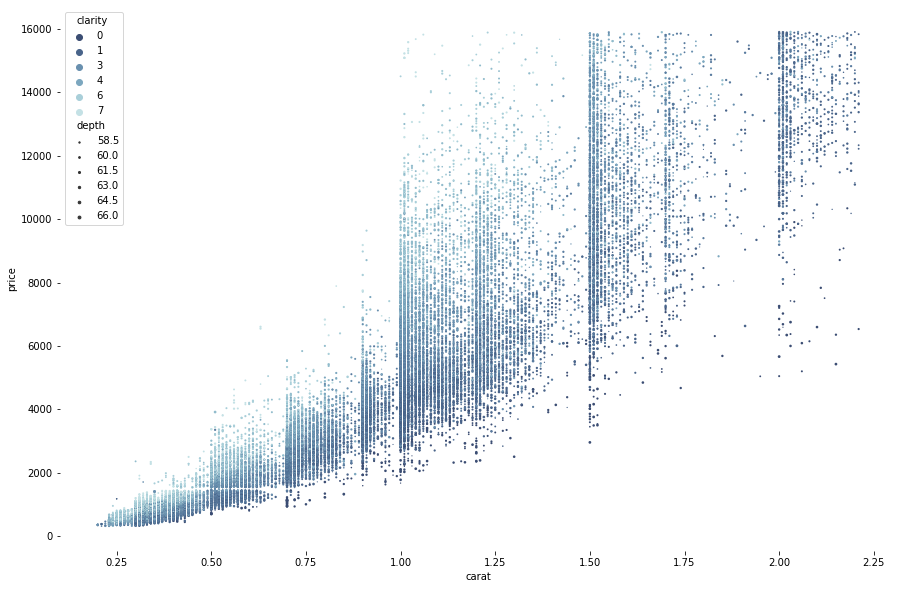

In [82]:
# Draw a scatter plot while assigning point colors and sizes to different
# variables in the dataset
# d = data[data['carat'] <= 4]
f, ax = plt.subplots(figsize=(15, 10))
sns.despine(f, left=True, bottom=True)
clarity_ranking = ["I1", "SI2", "SI1", "VS2", "VS1", "VVS2", "VVS1", "IF"]
sns.scatterplot(x="carat", y="price",
                hue="clarity", size="depth",
                palette="ch:r=-.2,d=.3_r",
                sizes=(1, 8), linewidth=0,
                data=data, ax=ax)


<Figure size 1080x720 with 0 Axes>

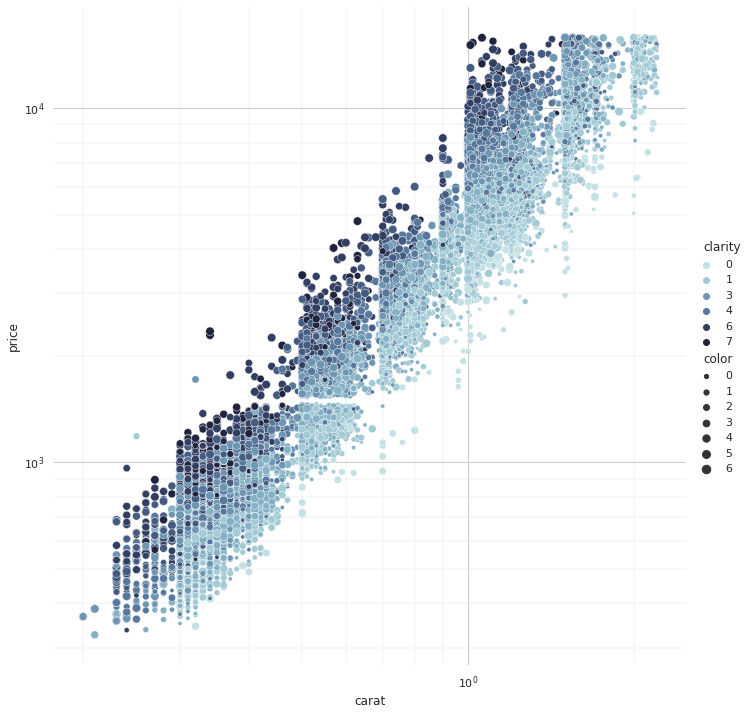

In [83]:
d = data.sample(n=15000)

plt.figure(figsize=(15, 10))
sns.set_theme(style="whitegrid")

cmap = sns.cubehelix_palette(rot=-.2, as_cmap=True)
g = sns.relplot(
    data=d,
    x="carat", y="price",
    hue="clarity", size="color",
    palette=cmap, height=10
)
g.set(xscale="log", yscale="log")
g.ax.xaxis.grid(True, "minor", linewidth=.25)
g.ax.yaxis.grid(True, "minor", linewidth=.25)
g.despine(left=True, bottom=True)


In [84]:
data.dtypes

carat      float64
cut          int64
color        int64
clarity      int64
depth      float64
table      float64
price        int64
x          float64
y          float64
z          float64
dtype: object

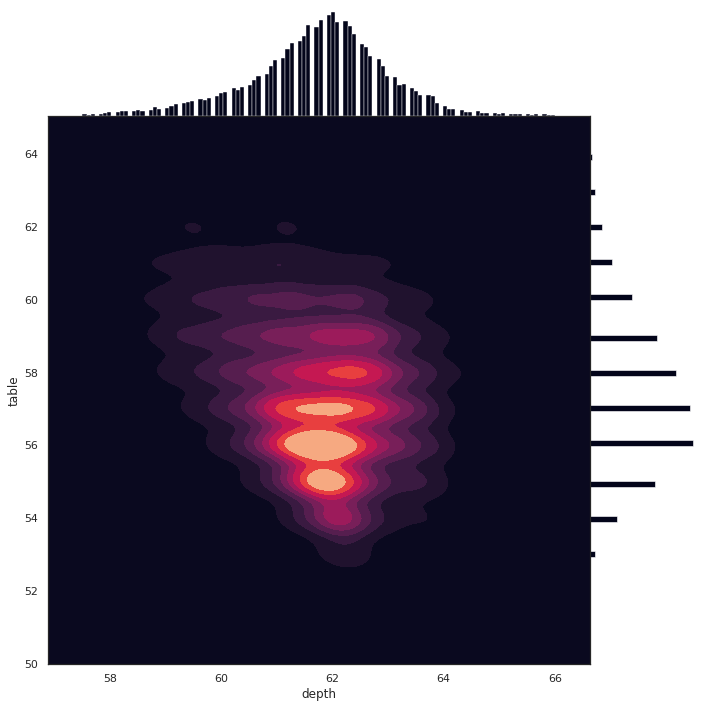

In [85]:
sns.set_theme(style="white")

g = sns.JointGrid(data=data, x="depth", y="table", space=0, height=10)
g.plot_joint(sns.kdeplot,
             fill=True,
             thresh=0, cmap="rocket")
g.plot_marginals(sns.histplot, color="#03051A", alpha=1)


In [86]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
carat,51590.0,0.759933,0.424983,0.20,0.39,0.70,1.02,2.21
cut,51590.0,2.812231,1.238661,0.00,2.00,3.00,4.00,4.00
color,51590.0,3.433553,1.694698,0.00,2.00,3.00,5.00,6.00
clarity,51590.0,3.086994,1.642585,0.00,2.00,3.00,4.00,7.00
depth,51590.0,61.752838,1.269255,57.50,61.10,61.80,62.50,66.00
table,51590.0,57.369137,2.100018,51.00,56.00,57.00,59.00,64.00
price,51590.0,3586.031847,3436.874161,326.00,926.00,2303.50,5047.00,15898.00
x,51590.0,5.657855,1.057420,3.73,4.69,5.66,6.49,8.60
y,51590.0,5.661272,1.050383,3.68,4.70,5.66,6.49,8.55
z,51590.0,3.494649,0.653051,1.53,2.89,3.49,4.01,5.30


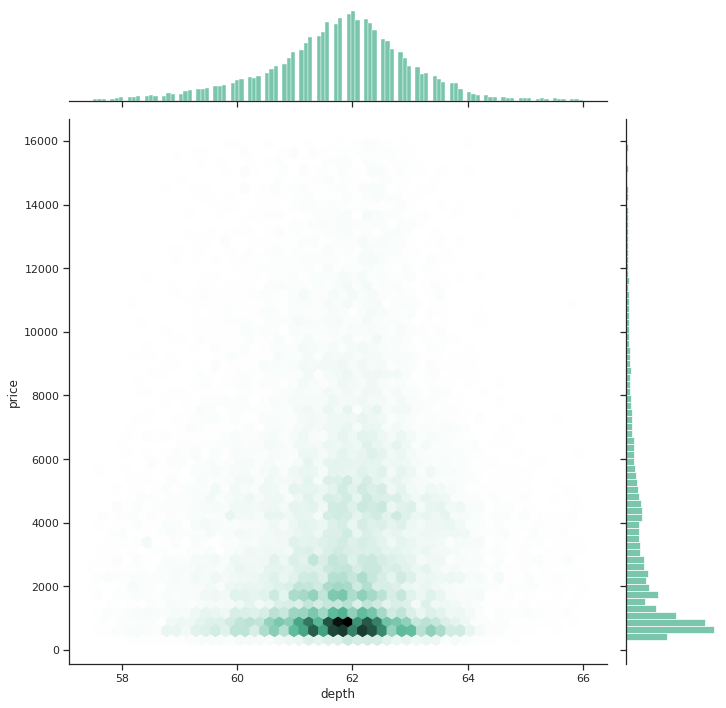

In [87]:
sns.set_theme(style="ticks")

sns.jointplot(x=data['depth'], y=data['price'],
              kind="hex", color="#4CB391", height=10)
# sns.jointplot(x=d['carat'], y=d['price'],
#               kind="hex", color="#4CB391", height=10)


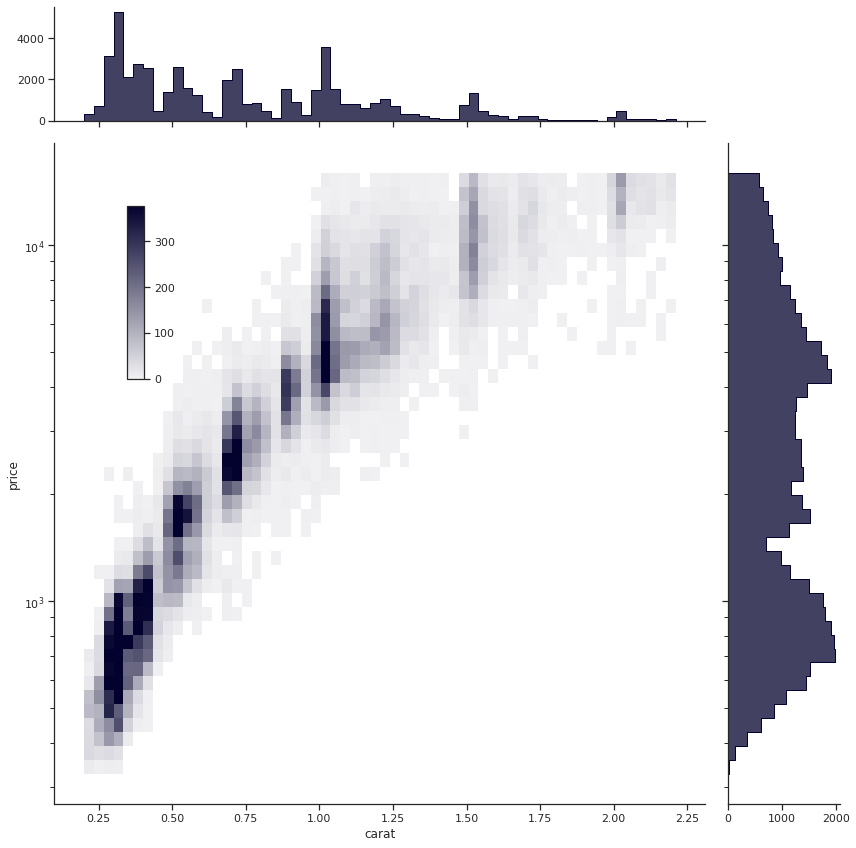

In [88]:
sns.set_theme(style="ticks")

g = sns.JointGrid(data=data, x="carat", y="price", marginal_ticks=True, height=12)

# Set a log scaling on the y axis
g.ax_joint.set(yscale="log")

# Create an inset legend for the histogram colorbar
cax = g.figure.add_axes([.15, .55, .02, .2])

# Add the joint and marginal histogram plots
g.plot_joint(
    sns.histplot, discrete=(False, False),
    cmap="light:#03012d", pmax=.8, cbar=True, cbar_ax=cax,
)
g.plot_marginals(sns.histplot, element="step", color="#03012d")


In [89]:
data['clarity'].unique()

array([1, 2, 3, 5, 6, 4, 0, 7])

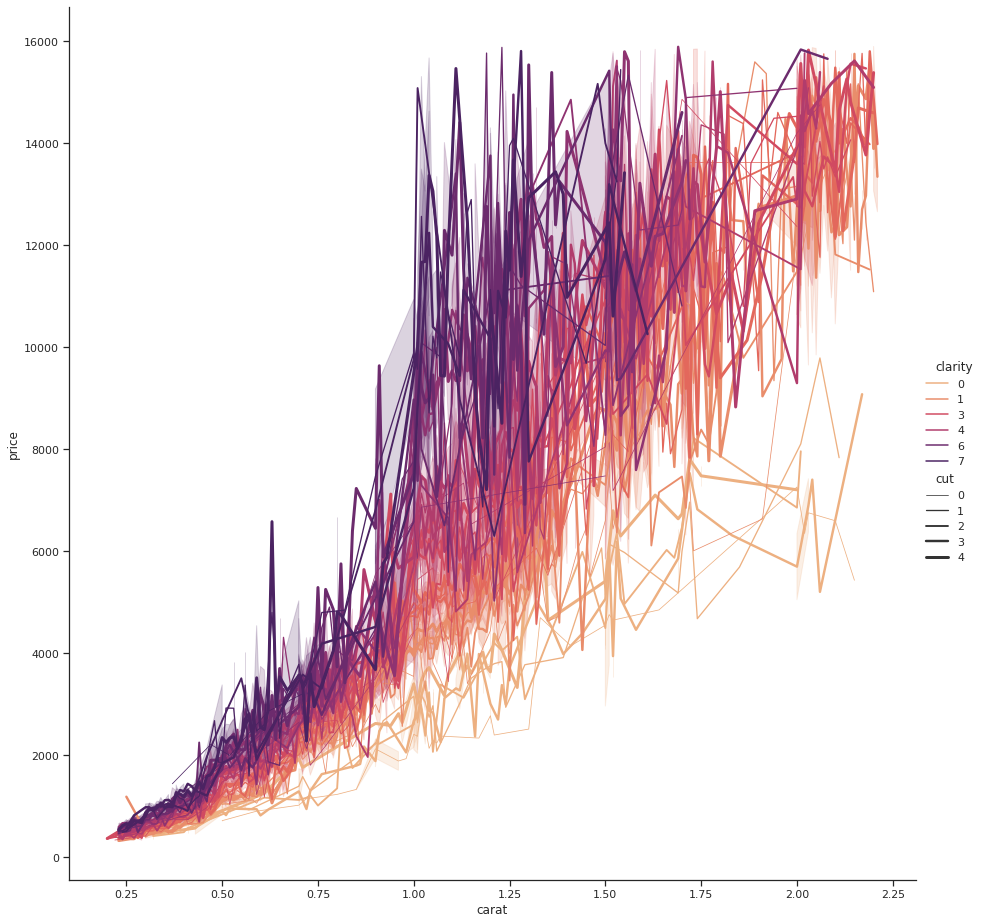

In [90]:
d = data.sample(30000)
sns.set_theme(style="ticks")

# Define the palette as a list to specify exact values
palette = sns.color_palette("flare", as_cmap=True)

# Plot the lines on two facets
sns.relplot(
    data=d,
    x="carat", y="price",
    hue="clarity", size="cut",
    kind="line", palette=palette,
    height=13, facet_kws=dict(sharex=False),
)
